Setup do ambiente
- Ferramentas
    - virtualenv
    - pyenv
- Comandos
    - virtualenv -p ~/.pyenv/versions/3.10.8/bin/python venv
    - source venv/bin/activate
    - pip install jupyter seaborn statsmodels pandas
    - jupyter notebook

In [1]:
!tree

.
├── hopi-hari.ipynb
├── README.md
├── ride-data
│   ├── Autopista
│   │   ├── autopista-abril.csv
│   │   ├── autopista-fevereiro.csv
│   │   ├── autopista-janeiro.csv
│   │   ├── autopista-julho.csv
│   │   ├── autopista-junho.csv
│   │   ├── autopista-maio.csv
│   │   └── autopista-marco.csv
│   ├── BabyElefante
│   │   ├── babyelefante-abril.csv
│   │   ├── babyelefante-fevereiro.csv
│   │   ├── babyelefante-janeiro.csv
│   │   ├── babyelefante-julho.csv
│   │   ├── babyelefante-junho.csv
│   │   ├── babyelefante-maio.csv
│   │   └── babyelefante-marco.csv
│   ├── BarcoPirata
│   │   ├── barcopirata-abril.csv
│   │   ├── barcopirata-fevereiro.csv
│   │   ├── barcopirata-janeiro.csv
│   │   ├── barcopirata-julho.csv
│   │   ├── barcopirata-junho.csv
│   │   ├── barcopirata-maio.csv
│   │   └── barcopirata-marco.csv
│   ├── BetinhoCarrero4D
│   │   ├── betinho4d-abril.csv
│   │   ├── betinho4d-fevereiro.csv
│   │   ├── betinho4d-janeiro.csv
│   │   ├── betinho4d-julho.csv
│   │   ├─

In [17]:
!pip list

Package                   Version
------------------------- -----------
anyio                     3.7.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
comm                      0.1.4
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7.post1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.42.1
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.1
ipython                   8.14.0
ipython-genut

In [27]:
import pandas as pd
import seaborn as sns

In [98]:
def read_ride(ride, month):
    return (
        pd
        .read_csv(f"ride-data/{ride}/{ride.lower()}-{month}.csv",)
        .rename(columns={'Ride': 'ride', 'Date/Time': 'timestamp', 'Wait Time': 'wait'})
        .assign(timestamp=lambda x: pd.to_datetime(x.timestamp))
        .assign(day=lambda x: x.timestamp.dt.day)
        .assign(hour=lambda x: x.timestamp.dt.hour + x.timestamp.dt.minute/60)
    )

rides = ['BabyElefante', 'BigTower']
month = 'maio'

df = pd.concat([read_ride(r, month) for r in rides])

# Filtrar os horários entre 10h30 e 19h30
df_filtered = df[(df['hour'] >= 10.6) & (df['hour'] <= 19.5)]

df_filtered.head()

,ride,timestamp,wait,day,hour
0,Baby Elefante,2023-05-01 10:40:04,30,1,10.666667
1,Baby Elefante,2023-05-01 10:45:04,30,1,10.750000
2,Baby Elefante,2023-05-01 10:50:04,30,1,10.833333
3,Baby Elefante,2023-05-01 10:55:04,30,1,10.916667
4,Baby Elefante,2023-05-01 11:00:04,30,1,11.000000


In [99]:
len(df_filtered)

3142

In [100]:
df_filtered.groupby('day').count()

,ride,timestamp,wait,hour
day,,,,
1,178,178,178,178
4,180,180,180,180
5,176,176,176,176
6,180,180,180,180
7,178,178,178,178
10,180,180,180,180
11,176,176,176,176
12,178,178,178,178
13,190,190,190,190


<AxesSubplot:xlabel='hour', ylabel='wait'>

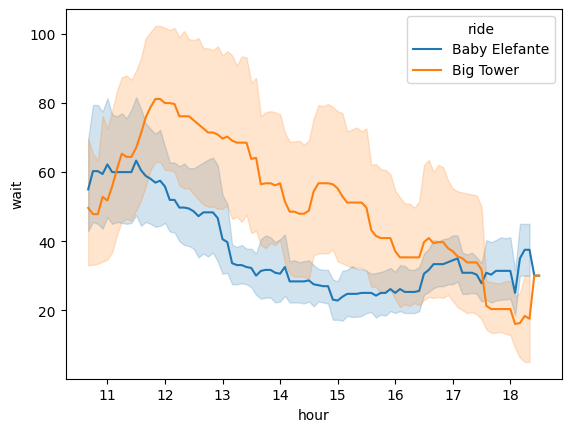

In [105]:
sns.lineplot(x='hour', y='wait', data=df_filtered, hue='ride')

<AxesSubplot:>

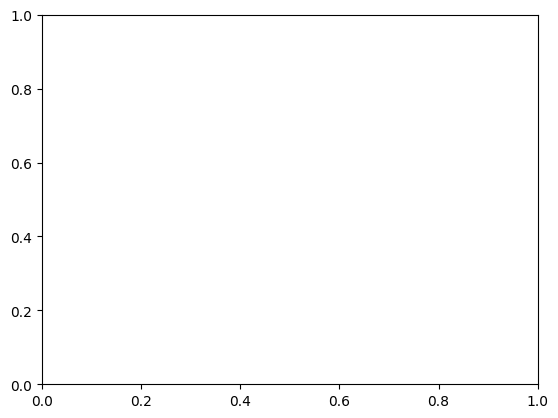

In [106]:
sns.lineplot(x='hour', y='wait', data=df[df.ride == 'Tigor Mountain'], hue='day')

In [103]:
df[(df.ride == 'Xicaras Malucas') & (df.wait > 100)]

,ride,timestamp,wait,day,hour


In [104]:
import statsmodels as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

In [84]:
smf.ols(formula='wait ~ C(hour)', data=df[df.ride == 'Tigor Mountain']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wait   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          7.83e-150
Time:                        21:27:46   Log-Likelihood:                -7776.6
No. Observations:                1615   AIC:                         1.557e+04
Df Residuals:                    1606   BIC:                         1.562e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.7959      4.277     12.813      0.000      46.408      63.184
C(hour)[T.11]    20.6013      4.741      4.345      0.000      11.302      29.901
C(hour)[T.12]    29.9726      4.737      6.327      0.000      20.681      39.264
C(hour)[T.13]     2.6578      4.737      0.561      0.575      -6.633      11.949
C(hour)[T.14]   -21.7172      4.737     -4.585      0.000     -31.008     -12.426
C(hour)[T.15]   -27.8515      4.737     -5.880      0.000     -37.143     -18.560
C(hour)[T.16]   -28.4302      4.737     -6.002      0.000     -37.721     -19.139
C(hour)[T.17]   -25.1431      4.737     -5.308      0.000     -34.434     -15.852
C(hour)[T.18]   -25.3316      5.856     -4.326      0.000     -36.818     -13.845
==============================================================================
Omnibus:                      241.034   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.509
Skew:                           0.913   Prob(JB):                    6.09e-101
Kurtosis:                       4.877   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""